# Rafik's kitchen - Madurai.
## Sales Analysis - 2022

**Importing the required libraries & packages**

In [1]:
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from pandas.api.types import CategoricalDtype
import ydata_profiling as pf
import locale
import warnings
warnings.filterwarnings('ignore')

**Changing The Default Working Directory Path**

In [2]:
os.chdir('D:\\Rafik Kitchen')

**Reading all the necessary datasets using pandas command**

In [3]:
a = pd.read_excel('Jan to Apr 2022.xlsx')
b = pd.read_excel('May to Aug 2022.xlsx')
c = pd.read_excel('Sep to Dec 2022.xlsx')

**Getting the number of records(sales) for every months of 2022 in each datasets**

In [4]:
print('Total.No.of Sales in Jan to Apr. 2022 - ',a.shape[0],'\n')
print('Total.No.of Sales in May to Aug. 2022 - ',b.shape[0],'\n')
print('Total.No.of Sales in Sep to Dec. 2022 - ',c.shape[0],'\n')

Total.No.of Sales in Jan to Apr. 2022 -  11702 

Total.No.of Sales in May to Aug. 2022 -  13494 

Total.No.of Sales in Sep to Dec. 2022 -  12960 



**Concatting the three datasets using pandas command to get the data for the whole year of 2022 in a single dataframe and displaying the first three records for verification**

In [5]:
df = pd.concat([a,b,c], axis = 0)
df.head(4)

,DATE,ORDER ID,ITEM CODE,ITEM,CATEGORY,QUANTITY,PRICE,TOTAL,PAYMENT MODE
0,2022-01-01,A0001,MC01,Chicken Fried Rice,Main Course,2,90,180,Cash
1,2022-01-01,A0001,S01,Mushroom - Plain,Starters,2,40,80,Cash
2,2022-01-01,A0001,MC03,Egg Fried Rice,Main Course,1,80,80,Cash
3,2022-01-01,A0002,MC02,Chicken Noodles,Main Course,3,90,270,UPI


**Getting the Total No. of Sales in the year 2022**

In [6]:
print('total No.of Sales in 2022 - ',df.shape[0])

total No.of Sales in 2022 -  38156


**Getting the data types for all the columns in the dataframe**

In [7]:
df.dtypes

DATE            datetime64[ns]
ORDER ID                object
ITEM CODE               object
ITEM                    object
CATEGORY                object
QUANTITY                 int64
PRICE                    int64
TOTAL                    int64
PAYMENT MODE            object
dtype: object

**Checking for all the null values in the dataset**

In [8]:
df.isna().sum()

DATE            0
ORDER ID        0
ITEM CODE       0
ITEM            0
CATEGORY        0
QUANTITY        0
PRICE           0
TOTAL           0
PAYMENT MODE    0
dtype: int64

**Checking the non-null value counts and dtypes using info command**

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38156 entries, 0 to 12959
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   DATE          38156 non-null  datetime64[ns]
 1   ORDER ID      38156 non-null  object        
 2   ITEM CODE     38156 non-null  object        
 3   ITEM          38156 non-null  object        
 4   CATEGORY      38156 non-null  object        
 5   QUANTITY      38156 non-null  int64         
 6   PRICE         38156 non-null  int64         
 7   TOTAL         38156 non-null  int64         
 8   PAYMENT MODE  38156 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(5)
memory usage: 2.9+ MB


**Getting the description of the data in all numeric columns using describe command**

In [10]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
QUANTITY,38156.0,2.590235,1.719166,1.0,1.0,2.0,3.0,18.0
PRICE,38156.0,103.361726,74.635328,40.0,60.0,90.0,110.0,350.0
TOTAL,38156.0,256.276339,258.465779,40.0,100.0,180.0,330.0,3150.0


**Getting the correlation values from all numeric columns from the dataframe**

In [11]:
df.corr()

,QUANTITY,PRICE,TOTAL
QUANTITY,1.000000,-0.089133,0.580481
PRICE,-0.089133,1.000000,0.618353
TOTAL,0.580481,0.618353,1.000000


**Getting the value counts for all the unquie records in the `CATEGORY` column of the dataframe**

In [12]:
df['CATEGORY'].value_counts()

Main Course    13548
Side Dish       9215
Starters        8997
Soft Drinks     5716
Drinks           680
Name: CATEGORY, dtype: int64

**Getting all the unique values of the `CATEGORY` column in the dataframe**

In [13]:
df.CATEGORY.unique()

array(['Main Course', 'Starters', 'Side Dish', 'Soft Drinks', 'Drinks'],
      dtype=object)

**Replacing the inappropriate data with the right data in the `CATEGORY` column and getting the value counts of the column to check the data in the dataframe**

In [14]:
df['CATEGORY'] = df['CATEGORY'].replace({'Drinks':'Soft Drinks'})
df['CATEGORY'].value_counts()

Main Course    13548
Side Dish       9215
Starters        8997
Soft Drinks     6396
Name: CATEGORY, dtype: int64

**Similarly getting the value counts for all the unique records in the `PAYMENT MODE` column of the dataframe**

In [15]:
df['PAYMENT MODE'].value_counts()

UPI      13864
Card     12150
Cash     12027
Card        76
card        39
Name: PAYMENT MODE, dtype: int64

**Getting all the unique values of the `PAYMENT MODE` column in the dataframe**

In [16]:
df['PAYMENT MODE'].unique()

array(['Cash', 'UPI', 'Card', 'Card ', 'card'], dtype=object)

**Replacing the inappropriate data with the right data in the `PAYMENT MODE` column and getting the value counts of the column to check the data in the dataframe**

In [17]:
df['PAYMENT MODE'] = df['PAYMENT MODE'].replace({'card':'Card','Card ':'Card'})
df['PAYMENT MODE'].value_counts()

UPI     13864
Card    12265
Cash    12027
Name: PAYMENT MODE, dtype: int64

**Similarly getting the value counts for all the unique records in the `ITEM` column of the dataframe**

In [18]:
df['ITEM'].value_counts()

Chicken Fried Rice                    2486
Chicken Noodles                       2350
Chicken Roll                          1465
Pepsi                                 1411
Schezwan Noodles                      1332
                                      ... 
Grilled Chicken - Quarter (Mint)        63
Grilled Chicken - Half (Pepper)         61
Grilled Chicken - Half (Garlic)         57
Grilled Chicken - Quarter (Pepper)      56
Lemonade(Sour)                          52
Name: ITEM, Length: 68, dtype: int64

**Getting all the unique values of the `ITEM` column in the dataframe**

In [19]:
df['ITEM'].unique()

array(['Chicken Fried Rice', 'Mushroom - Plain', 'Egg Fried Rice',
       'Chicken Noodles', 'Chicken Shawarma Roll', 'Chicken 65',
       'Egg Mushroom', 'Chicken Boneless', 'Grilled Chicken - Quarter',
       'Pepper Chicken', 'Mojito (Blue)', 'Veg Fried Rice', 'Veg Noodles',
       'Grilled Chicken - Half (Pepper)', 'Chicken Roll',
       'Grilled Chicken - Full (Mint)', 'Grilled Chicken - Half(Garlic)',
       'Mojito (Green)', 'Coco Cola', 'Lemonade (Sweet)',
       'Schezwan Noodles', 'Assorted Noodles', 'Egg Noodles',
       'Chicken Shawarma Plate', 'Pepsi', 'Chilli Parotta - Plain',
       'Chicken Mushroom', 'Grilled Chicken - Quarter (Mint)',
       'Chilli Chicken', 'Schezwan Fried Rice', 'Assorted Fried Rice',
       'Lemonade (Sour)', 'Chicken Chilli Parotta', 'Chicken Manchurian',
       'Gobi Noodles', 'Gobi 65', 'Grilled Chicken - Full',
       'Grilled Chicken - Full (Pepper)',
       'Grilled Chicken - Full (Garlic)', 'Gobi Fried Rice',
       'Chicken Shawarma Roll 

**Replacing the inappropriate data with the right data in the `ITEM` column and getting the value counts of the column to check the data in the dataframe**

In [20]:
df['ITEM'] = df['ITEM'].replace({'Chicken Shawarma Roll ':'Chicken Shawarma Roll',
                                 ' Chicken Shawarma  Roll':'Chicken Shawarma Roll',
                                'Chilli Parotta Plain':'Chilli Parotta - Plain','Coco - cola':'Coco Cola',
                                'Grilled Chicken - Full(Garlic)':'Grilled Chicken - Full (Garlic)',
                                'Grilled Chicken Full (Garlic) ':'Grilled Chicken - Full (Garlic)',
                                'Grilled Chicken - Full(Mint)':'Grilled Chicken - Full (Mint)',
                                'Grilled Chicken Full (Mint) ':'Grilled Chicken - Full (Mint)',
                                'Grilled Chicken - Full(Pepper)':'Grilled Chicken - Full (Pepper)',
                                'Grilled Chicken Full (Pepper) ':'Grilled Chicken - Full (Pepper)',
                                'Grilled Chicken - Half(Garlic)':'Grilled Chicken - Half (Garlic)',
                                'Grilled Chicken Half (Garlic) ':'Grilled Chicken - Half (Garlic)',
                                'Grilled Chicken - Half(pepper)':'Grilled Chicken - Half (Pepper)',
                                'Grilled Chicken Half (Pepper) ':'Grilled Chicken - Half (Pepper)',
                                'Grilled Chicken - Quarter(Garlic)':'Grilled Chicken - Quarter (Garlic)',
                                'Grilled Chicken - Quater(Mint)':'Grilled Chicken - Quarter (Mint)',
                                'Grilled Chicken Quarter (Mint) ':'Grilled Chicken - Quarter (Mint)',
                                'Grilled Chicken - Quater(Pepper)':'Grilled Chicken - Quarter (Pepper)',
                                'Grilled Chicken Quarter (Pepper) ':'Grilled Chicken - Quarter (Pepper)',
                                'Lemonade(Sour)':'Lemonade (Sour)','Mojito(Blue)':'Mojito (Blue)',
                                'Mojito(Green)':'Mojito (Green)','Mushroom Plain':'Mushroom - Plain'})
df['ITEM'].value_counts()

Chicken Fried Rice                    2486
Chicken Noodles                       2350
Chicken Roll                          1465
Chicken Shawarma Roll                 1419
Pepsi                                 1411
Schezwan Noodles                      1332
Mojito (Blue)                         1297
Chicken Shawarma Plate                1293
Mojito (Green)                        1264
Coco Cola                             1253
Gobi 65                               1069
Assorted Fried Rice                   1063
Schezwan Fried Rice                   1021
Egg Mushroom                          1011
Assorted Noodles                       982
Grilled Chicken - Full                 962
Chilli Parotta - Plain                 931
Egg Noodles                            886
Pepper Chicken                         825
Chicken Chilli Parotta                 825
Chicken Mushroom                       823
Lemonade (Sweet)                       779
Veg Fried Rice                         778
Mushroom - 

**Exporting the dataframe as a CSV(Comma Separated Value) file to the working directory**

In [21]:
df.to_csv('FastFood Sales Data 2022.csv', index = False)

**Automated Exploratory Data Analysis (EDA) with ydata_profiling(pandas_profiling)**

In [22]:
EDA_Report = pf.ProfileReport(df)
display(EDA_Report)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

**Exporting the EDA as a HTML(Hyper Text Markup Language) file to the working directory**

In [23]:
EDA_Report.to_file('EDA Report.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

**Getting the correlation Values from all the numeric columns from the dataset using Seaborn Heatmap**

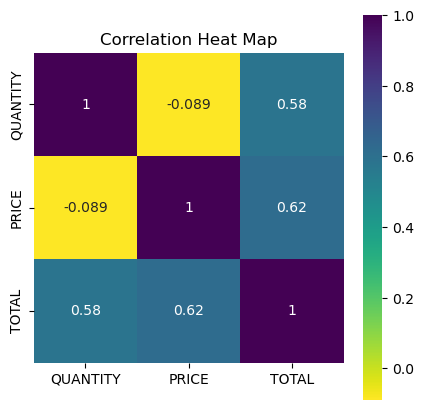

In [24]:
plt.rcParams['figure.figsize'] = (5,5)
sns. heatmap(df.corr(),cmap='viridis_r',annot = True, square = True)
plt.title('Correlation Heat Map')
plt.show()

**Getting the insights for `PAYMENT MODE` to get the number of transactions in the digital transactions & traditional transactions**

In [25]:
payment = df['PAYMENT MODE'].value_counts()
print('Total No. of Transactions',payment.values[0]+payment.values[1]+payment.values[2],'\n')
print('The most commonly used payment mode is',payment.index[0],'with',payment.values[0],'transactions','\n')
print('The least used payment mode is',payment.index[2],'with',payment.values[0],'transactions','\n')
print('India is moving towards the Digital Transaction such as UPI & Card.','\n')
print('Total no. of digital transactions i.e., Card & UPI are',payment.values[0]+payment.values[1],'\n')

Total No. of Transactions 38156 

The most commonly used payment mode is UPI with 13864 transactions 

The least used payment mode is Cash with 13864 transactions 

India is moving towards the Digital Transaction such as UPI & Card. 

Total no. of digital transactions i.e., Card & UPI are 26129 



**Displaying the insights of `PAYMENT MODE` using Pie Chart**

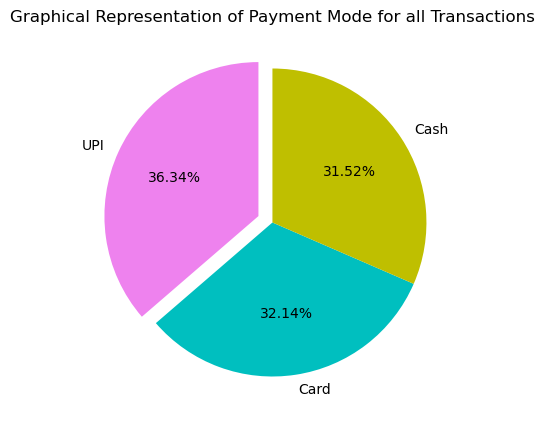

In [26]:
plt.rcParams['figure.figsize'] = (10,5)
plt.pie(payment.values,labels=payment.index,startangle=90,shadow= False, colors=('violet','c','y'),
       explode = (0.1,0,0), autopct = '%1.2f%%')
plt.title('Graphical Representation of Payment Mode for all Transactions')
plt.show()

**Getting the minimum no. of quantities, maximum no. of quantities and total no. of quantities along with minimum revenue, maximum revenue and total revenue generated for each and every items in the menu list**

In [27]:
min_max_sum_orders_revenue = df.groupby('ITEM').agg({'QUANTITY':[np.min,np.max,np.sum],'TOTAL':[np.min,np.max,np.sum]})
min_max_sum_orders_revenue

QUANTITY            TOTAL              
                                       amin amax   sum  amin  amax     sum
ITEM                                                                      
Assorted Fried Rice                       1   10  2869   120  1200  344280
Assorted Noodles                          1   12  2986   120  1440  358320
Chicken 65                                1   12  1232    50   600   61600
Chicken Boneless                          1   10   956    70   700   66920
Chicken Chilli Parotta                    1    8  1953    60   480  117180
Chicken Fried Rice                        1   15  6872    90  1350  618480
Chicken Manchurian                        1    7  1182   100   700  118200
Chicken Mushroom                          1    5  1705    60   300  102300
Chicken Noodles                           1   15  6068    90  1350  546300
Chicken Roll                              1   12  3897   100  1200  389700
Chicken Shawarma Plate                    1   10  3011   130  1300  390830
Chicken Shawarma Roll                     1    9  3888    90   810  350640
Chilli Chicken                            1    9  1444   100   900  144400
Chilli Parotta - Plain                    1    8  2053    40   320   82120
Coco Cola                                 1   18  4682    40   720  187280
Egg Chilli Parotta                        1    8  1107    50   400   55350
Egg Fried Rice                            1    8  1720    80   640  137620
Egg Mushroom                              1   10  2674    50   500  133700
Egg Noodles                               1    8  1994    80   640  159520
Gobi 65                                   1    9  2982    45   405  134190
Gobi Fried Rice                           1   10  1629    75   750  122175
Gobi Noodles                              1    9  1669    75   675  125175
Grilled Chicken - Full                    1    9  2087   330  2970  688710
Grilled Chicken - Full (Garlic)           1    9  1207   350  3150  422450
Grilled Chicken - Full (Mint)             1    8  1531   350  2800  536750
Grilled Chicken - Full (Pepper)           1    8  1493   350  2800  522550
Grilled Chicken - Half                    1    7   925   180  1260  166200
Grilled Chicken - Half (Garlic)           1    8   659   200  1600  130600
Grilled Chicken - Half (Mint)             1    7   191   200  1400   38200
Grilled Chicken - Half (Pepper)           1    8   700   200  1600  139400
Grilled Chicken - Quarter                 1    8   439   100   800   43900
Grilled Chicken - Quarter (Garlic)        1   12   701   120  1440   84120
Grilled Chicken - Quarter (Mint)          1    8   478   120   960   57360
Grilled Chicken - Quarter (Pepper)        1    9   629   120  1080   75480
Lemonade (Sour)                           1   10  1273    60   600   76380
Lemonade (Sweet)                          1    9  2146    60   540  128760
Mojito (Blue)                             1   14  4344    70   980  304080
Mojito (Green)                            1   12  4289    70   840  300230
Mushroom - Plain                          1    9  1630    40   360   65200
Pepper Chicken                            1    9  1885   100   900  188500
Pepsi                                     1   11  4480    40   440  179380
Schezwan Fried Rice                       1    9  2788   110   990  306680
Schezwan Noodles                          1    9  3258   110   990  358380
Veg Fried Rice                            1    8  1734    70   560  121380
Veg Noodles                               1    9  1393    70   630   97510

**Getting the insights of the item that is mostly ordered & least ordered by customers and the no. of units ordered by the customers**

In [28]:
Items = df.groupby('ITEM')['QUANTITY'].sum().sort_values(ascending = False)
print('The best-selling item in the FastFood Restaurant is',Items.index[0],'with',Items.values[0],'quantities','\n')
print('The least-selling item in the fastFood Restaurant is',Items.index[-1],'with',Items.values[-1],'quantities')

The best-selling item in the FastFood Restaurant is Chicken Fried Rice with 6872 quantities 

The least-selling item in the fastFood Restaurant is Grilled Chicken - Half (Mint) with 191 quantities


**Displaying the best selling 5 items in the menu along with the no. of quantities ordered using bar chart**

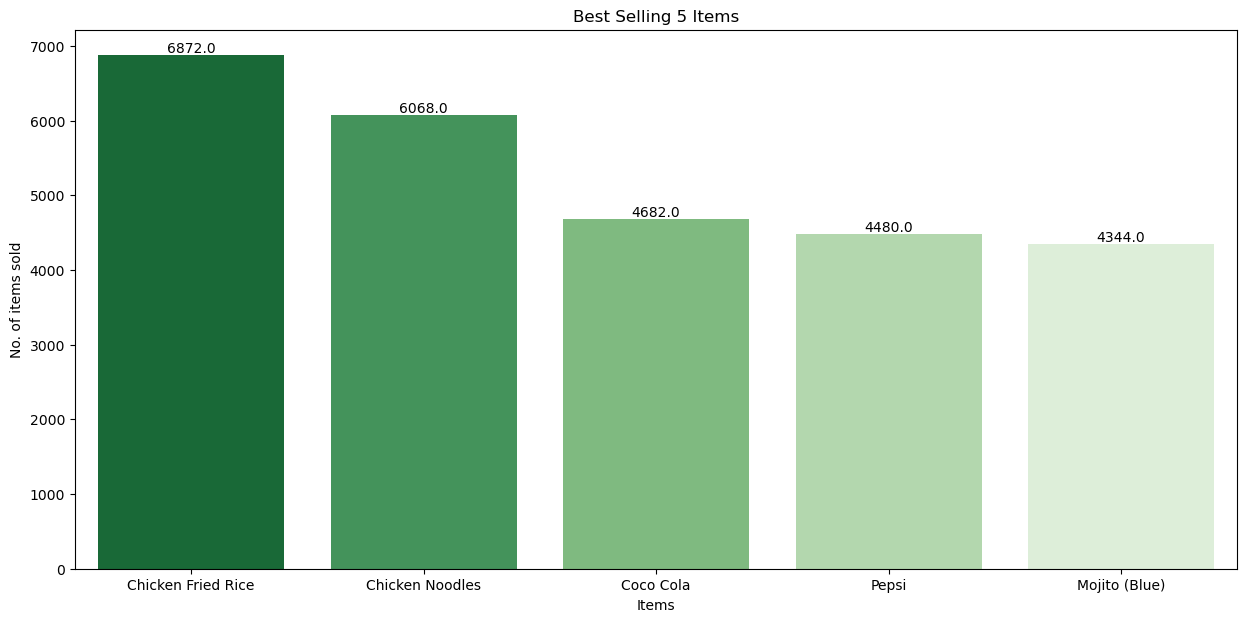

In [29]:
plt.rcParams['figure.figsize'] = (15,7)
top_item = sns.barplot(x = Items.index[:5],y = Items.values[:5],palette = 'Greens_r')
for p in top_item.patches:
    top_item.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('Best Selling 5 Items')
plt.xlabel('Items')
plt.ylabel('No. of items sold')
plt.show()

**Displaying the least selling 5 items in the menu along with the no. of quantities ordered using bar chart**

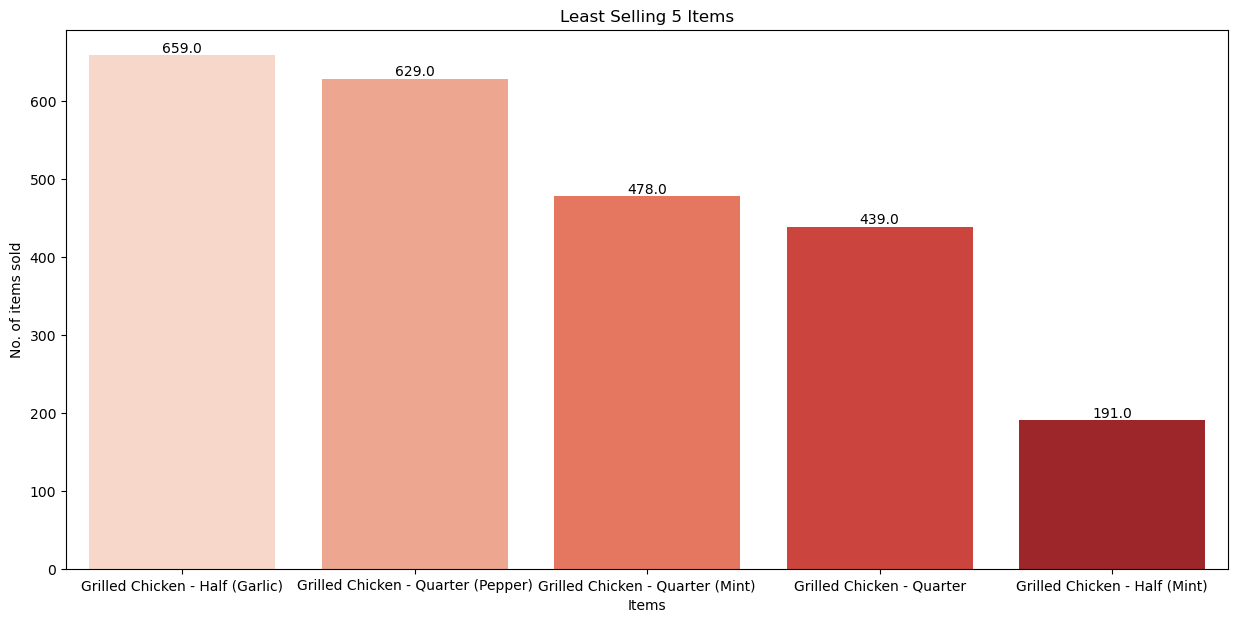

In [30]:
plt.rcParams['figure.figsize'] = (15,7)
bottom_item = sns.barplot(x=Items.index[-5:],y=Items.values[-5:],palette = 'Reds')
for p in bottom_item.patches:
    bottom_item.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('Least Selling 5 Items')
plt.xlabel('Items')
plt.ylabel('No. of items sold')
plt.show()

**Dispalying the each and every item in the menu list and the order quantities of them using bar chart**

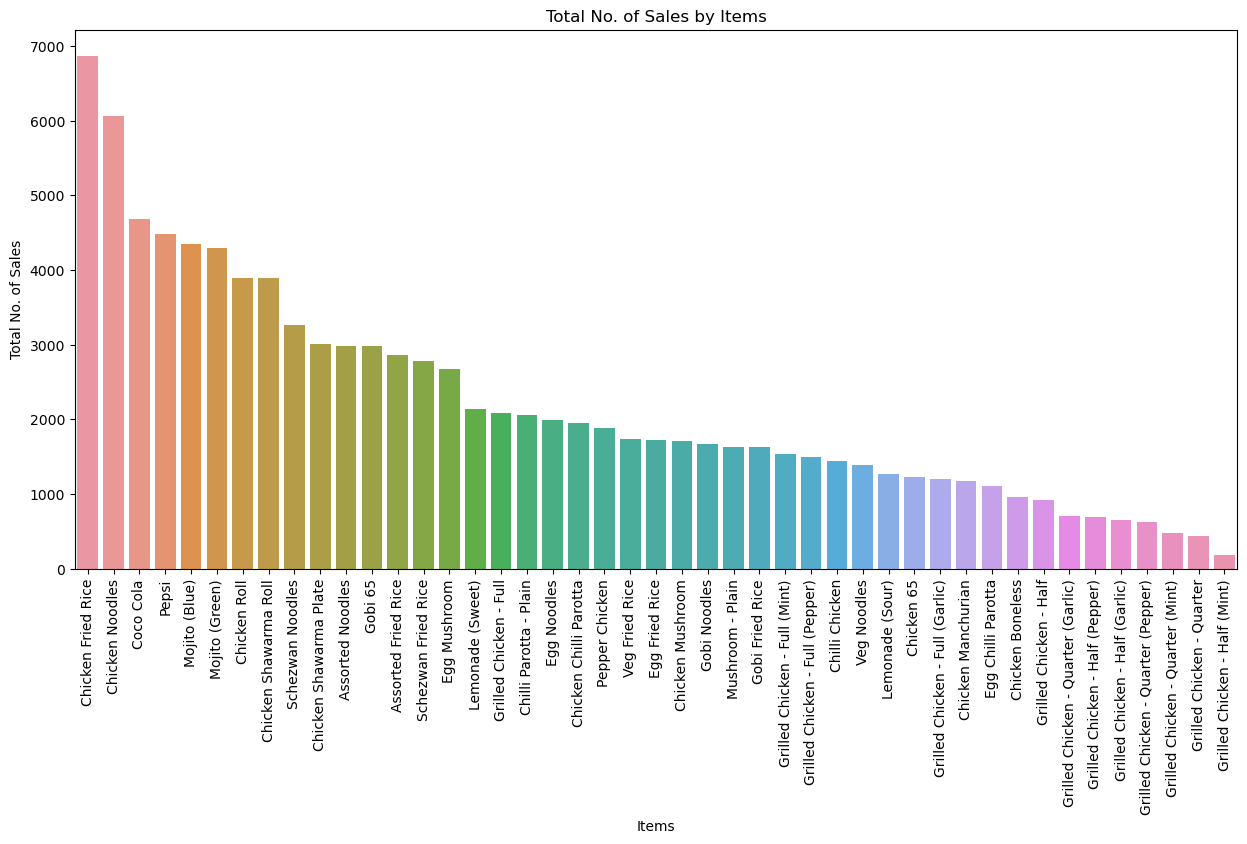

In [31]:
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(x = Items.index, y = Items.values)
plt.xticks(rotation = 90)
plt.title('Total No. of Sales by Items')
plt.xlabel('Items')
plt.ylabel('Total No. of Sales')
plt.show()

**Getting the insights of the item in the menu list that generates highest revenue and lowest revenue along with the sum of revenue generated**

In [32]:
locale.setlocale(locale.LC_ALL, 'en_IN.UTF-8')
Revenue = df.groupby('ITEM')['TOTAL'].sum().sort_values(ascending = False)
high_revenue = locale.currency(Revenue.values[0], grouping=True)
low_revenue = locale.currency(Revenue.values[-1], grouping=True)
print('The highest revenue generating item in the Restaurant is',Revenue.index[0],'with the sum of',high_revenue,'\n')
print('The Lowest revenue generating item in the Restaurant is',Revenue.index[-1],'with the sum of',low_revenue)

The highest revenue generating item in the Restaurant is Grilled Chicken - Full with the sum of ₹ 6,88,710.00 

The Lowest revenue generating item in the Restaurant is Grilled Chicken - Half (Mint) with the sum of ₹ 38,200.00


**Displaying the high revenue generating 5 items in the menu along with the sum of generated revenue using bar chart**

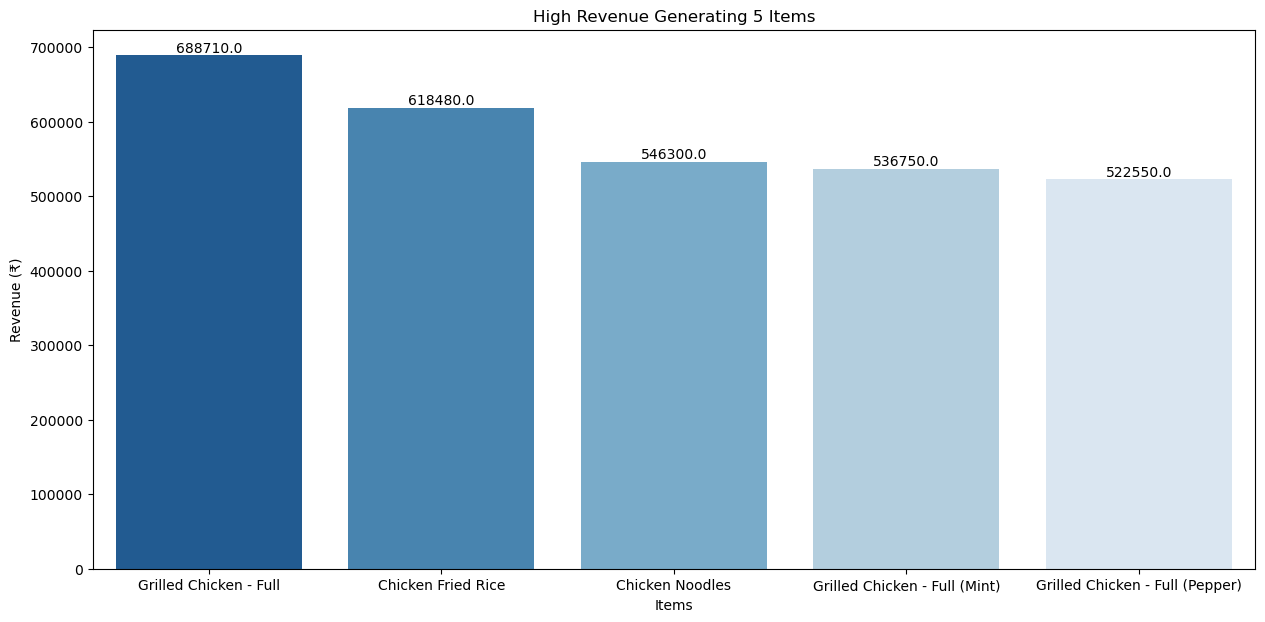

In [33]:
plt.rcParams['figure.figsize'] = (15,7)
high_revenue_item = sns.barplot(x = Revenue.index[:5],y = Revenue.values[:5],palette = 'Blues_r')
for p in high_revenue_item.patches:
    high_revenue_item.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('High Revenue Generating 5 Items')
plt.xlabel('Items')
plt.ylabel('Revenue (₹)')
plt.show()

**Displaying the low revenue generating 5 items in the menu along with the sum of generated revenue using bar chart**

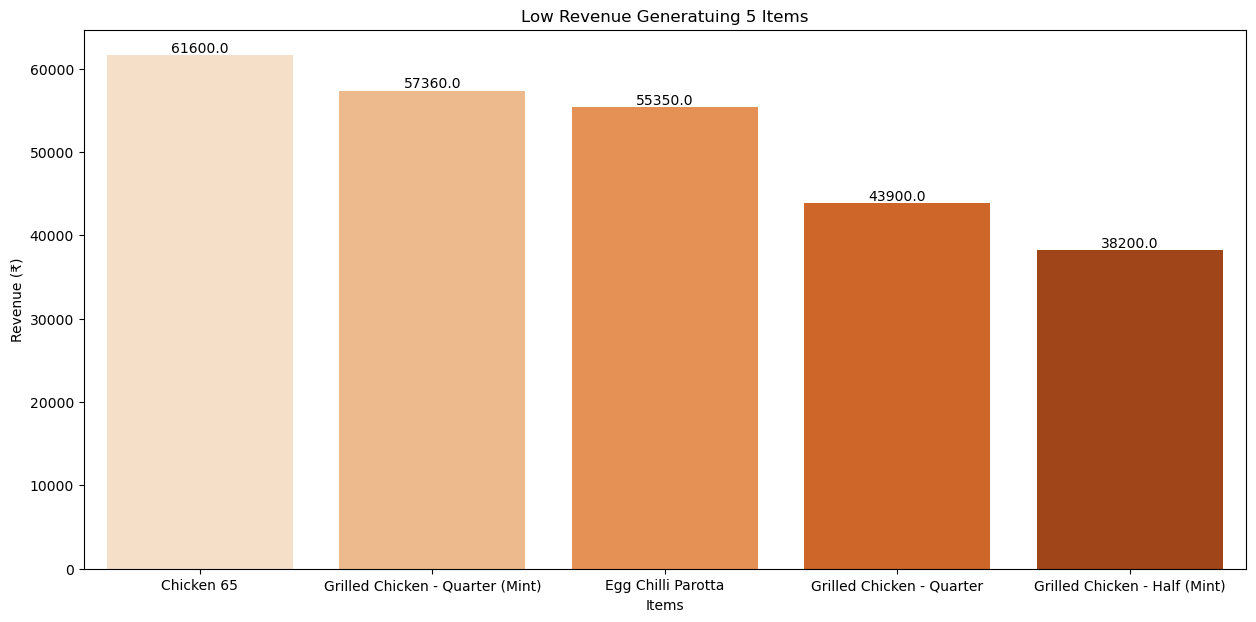

In [34]:
plt.rcParams['figure.figsize'] = (15,7)
low_revenue_item = sns.barplot(x=Revenue.index[-5:],y=Revenue.values[-5:],palette = 'Oranges')
for p in low_revenue_item.patches:
    low_revenue_item.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('Low Revenue Generatuing 5 Items')
plt.xlabel('Items')
plt.ylabel('Revenue (₹)')
plt.show()

**Dispalying the each and every item in the menu list and the revenue generated by them using bar chart**

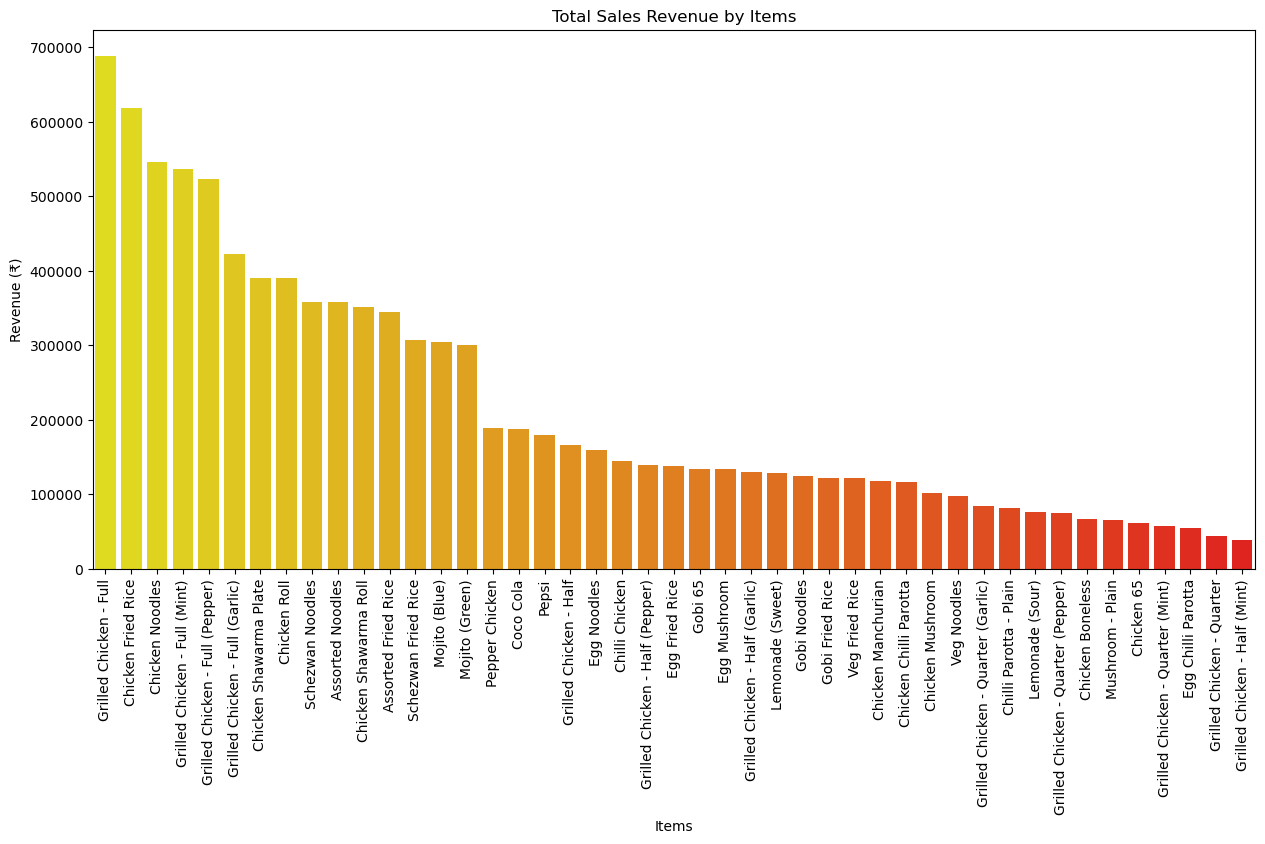

In [35]:
plt.rcParams['figure.figsize'] = (15,7)
sns.barplot(x = Revenue.index, y = Revenue.values, palette = 'autumn_r')
plt.xticks(rotation = 90)
plt.title('Total Sales Revenue by Items')
plt.xlabel('Items')
plt.ylabel('Revenue (₹)')
plt.show()

**Adding a new column of `DAY OF SALES` to the dataframe by separating the day name from `DATE` column for further analysis purposes**

In [36]:
df['DAY OF SALES']=df['DATE'].dt.day_name()

**Arranging the `DAY OF SALES` column in the Calender Weekly Order for getting the insights as in Calender order**

In [37]:
week_order = [ 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday']
df['DAY OF SALES'] = df['DAY OF SALES'].astype(CategoricalDtype(categories=week_order, ordered=True))

**Getting the insights of the revenue generated for all the week days in the year 2022**

In [38]:
Day_Sales = df.groupby('DAY OF SALES')['TOTAL'].sum()
print('The Sales Revenue for Every Weekday in 2022')
print(Day_Sales)

The Sales Revenue for Every Weekday in 2022
DAY OF SALES
Sunday       1877810
Monday       1183335
Tuesday      1203645
Wednesday    1278575
Thursday     1326470
Friday       1342845
Saturday     1565800
Name: TOTAL, dtype: int64


**Getting the insights of all weekdays that generated high revenue and low revenue with the sum of revenue generated along with the observation**

In [39]:
Day_Revenue = df.groupby('DAY OF SALES')['TOTAL'].sum().sort_values(ascending = False)
high_day_revenue = locale.currency(Day_Revenue.values[0], grouping = True)
low_day_revenue = locale.currency(Day_Revenue.values[-1], grouping = True)
weekend_revenue = locale.currency(Day_Revenue.values[1], grouping = True)
print('The highest revenue generating day is', Day_Revenue.index[0],'& the revenue is',high_day_revenue,'\n')
print('The lowest revenue generating day is', Day_Revenue.index[-1],'& the revenue is',low_day_revenue,'\n')
print('we can clearly observe that weekends are the days where the sales and revenue is high compared to weekdays.\n')
print('The sum of revenue generated on weekdays that is on',Day_Revenue.index[1],'and',Day_Revenue.index[0],'are',weekend_revenue)

The highest revenue generating day is Sunday & the revenue is ₹ 18,77,810.00 

The lowest revenue generating day is Monday & the revenue is ₹ 11,83,335.00 

we can clearly observe that weekends are the days where the sales and revenue is high compared to weekdays.

The sum of revenue generated on weekdays that is on Saturday and Sunday are ₹ 15,65,800.00


**Displaying the sum of Revenue Generated for all the weekdays using the bar chart with the sum of revenue**

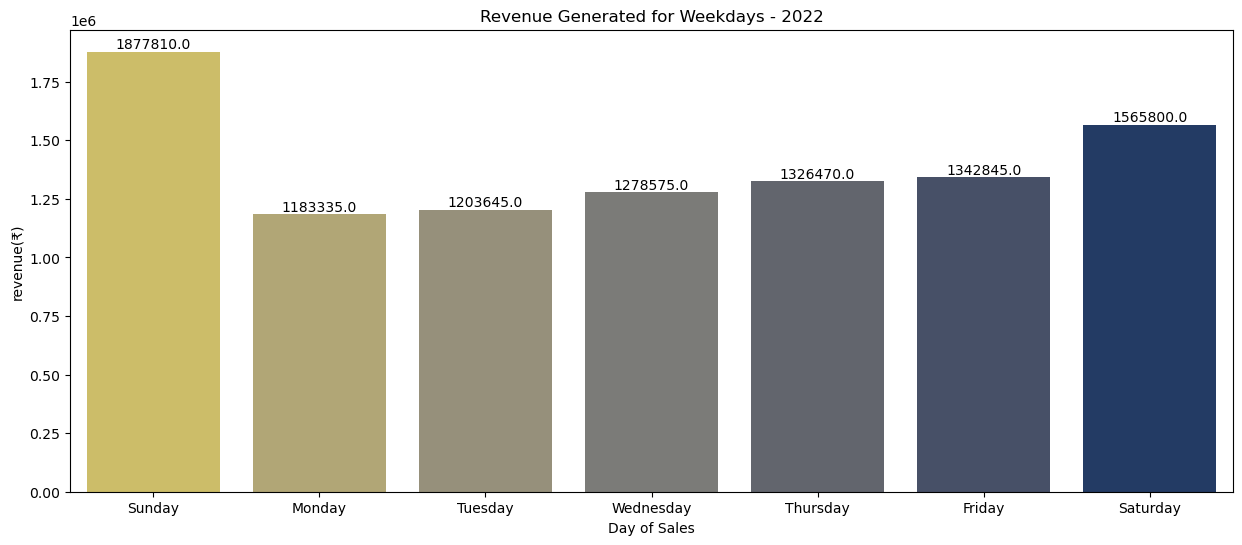

In [40]:
plt.rcParams['figure.figsize']=15,6
day_s = sns.barplot(Day_Sales.index,Day_Sales.values,palette = 'cividis_r')
for p in day_s.patches:
    day_s.annotate(p.get_height(),(p.get_x() + p.get_width() / 2.0,p.get_height()),
                  ha ='center', va= 'center',xytext =(0,5),textcoords ='offset points')
plt.title('Revenue Generated for Weekdays - 2022')
plt.xlabel('Day of Sales')
plt.ylabel('revenue(₹)')
plt.show()

**Adding a new column of `MONTH OF SALES` to the dataframe by separating the day name from `DATE` column for further analysis purposes**

In [41]:
df['MONTH OF SALES'] = df['DATE'].dt.month_name()

**Arranging the `MONTH OF SALES` column in the Calender Weekly Order for getting the insights as in Calender order**

In [42]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
               'August', 'September', 'October', 'November', 'December']
df['MONTH OF SALES'] = df['MONTH OF SALES'].astype(CategoricalDtype(categories=month_order, ordered=True))

**Getting the insights of the revenue generated for each and every month in the year 2022**

In [43]:
Monthly_Sales = df.groupby('MONTH OF SALES')['TOTAL'].sum()
print('The Sales Revenue for Every Month in 2022')
print(Monthly_Sales)

The Sales Revenue for Every Month in 2022
MONTH OF SALES
January      907165
February     844035
March        934185
April        465350
May          838640
June         853955
July         825000
August       871440
September    829460
October      808495
November     783540
December     817215
Name: TOTAL, dtype: int64


**Getting the insights of the month which generated high revenue and low revenue with the sum of revenue generated**

In [44]:
Monthly_Revenue = df.groupby('MONTH OF SALES')['TOTAL'].sum().sort_values(ascending = False)
high_Monthly_revenue = locale.currency(Monthly_Revenue.values[0], grouping = True)
low_Monthly_revenue = locale.currency(Monthly_Revenue.values[-1], grouping = True)
print('The month that generated high revenue is', Monthly_Revenue.index[0],'& the generated revenue is',high_Monthly_revenue,'\n')
print('The month that generated low revenue is', Monthly_Revenue.index[-1],'& the generated revenue is',low_Monthly_revenue,'\n')

The month that generated high revenue is March & the generated revenue is ₹ 9,34,185.00 

The month that generated low revenue is April & the generated revenue is ₹ 4,65,350.00 



**plotting the line graph to show the data trend of generated revenue for every month with the value of revenue generated**

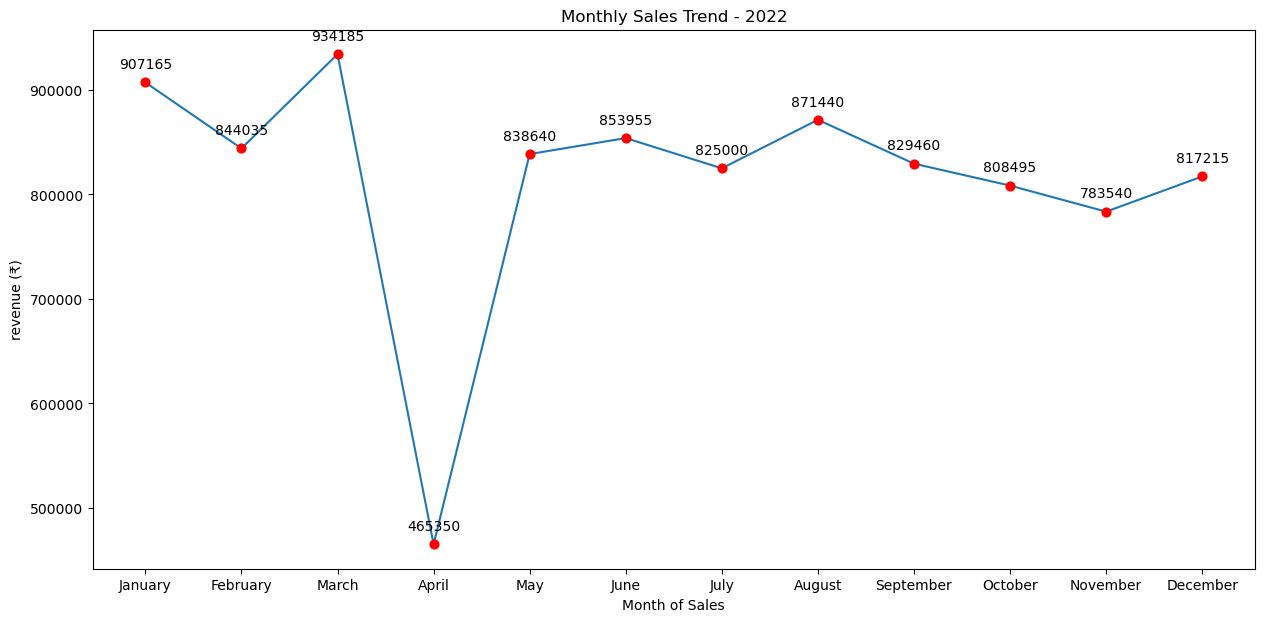

In [45]:
plt.rcParams['figure.figsize'] = 15,7
plt.plot(Monthly_Sales.index,Monthly_Sales.values)
for i, txt in enumerate(Monthly_Sales.values):
    plt.annotate(txt,(Monthly_Sales.index[i],Monthly_Sales.values[i]),textcoords = 'offset points', 
                 xytext = (0,10),ha = 'center')
    plt.scatter(Monthly_Sales.index[i],Monthly_Sales[i],color = 'red', s = 40, zorder = 5)
plt.title('Monthly Sales Trend - 2022')
plt.xlabel('Month of Sales')
plt.ylabel('revenue (₹)')
plt.show()